<a href="https://colab.research.google.com/github/SDanaei/harvest_management/blob/main/NN/prog_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/growthData/wheat_new.csv")
df.head()

,@YEAR,DOY,DAP,GSTD,LAID,RWAD,LWAD,SWAD,HIAD
0,1981,289,0,0.00,0.0,0,0,0,0.0
1,1981,290,1,5.58,0.0,0,0,0,0.0
2,1981,291,2,6.54,0.0,1,0,0,0.0
3,1981,292,3,7.81,0.0,2,0,0,0.0
4,1981,293,4,9.69,0.0,3,0,0,0.0


In [ ]:
# Separating X, Y from main dataset
X = df.drop(['GSTD'],axis=1)
Y = df[["GSTD"]]

In [ ]:
# One Hot Encoding
# 1.One Hot Encoder
# 2.Transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
cat_feature = ['@YEAR'] 
transformer = ColumnTransformer([('one_hot', one_hot, cat_feature)],
                                remainder='passthrough')

trans_x = transformer.fit_transform(X)
trans_x = pd.DataFrame(trans_x)
trans_x.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,289.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,290.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,291.0,2.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,292.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,293.0,4.0,0.0,3.0,0.0,0.0,0.0


In [ ]:
# Train & Test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(trans_x, Y, test_size=0.2)
print (x_train.shape,y_train.shape)
print (x_test.shape,y_test.shape)

(200, 9) (200, 1)
(51, 9) (51, 1)


In [ ]:
# Creating  a model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
keras.backend.clear_session()

def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(X[0])]),
        Dense(1)
    ])

    model.compile( 
                  loss='mae',
                  metrics=['mae', 'mse', 'accuracy'])
    # print(model.summary())
    return model




In [ ]:
#training

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

X = np.array(x_train)
Y = np.array(y_train)


model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=100)
history = model.fit(X, Y, epochs=1000, verbose=0, validation_split = 0.2,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.............................................................

In [ ]:
#
rmse_final = np.sqrt(float(hist['val_mae'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


Final Root Mean Square Error on validation set: 2.039


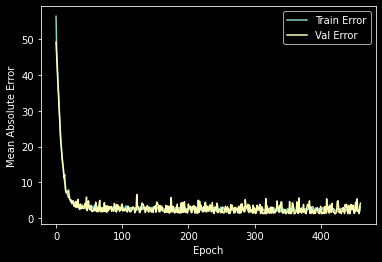

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.legend()
    plt.show()

plot_history()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#test data
XTest = np.array(x_test)
YTest = np.array(y_test)

predict_y = model.predict(XTest)

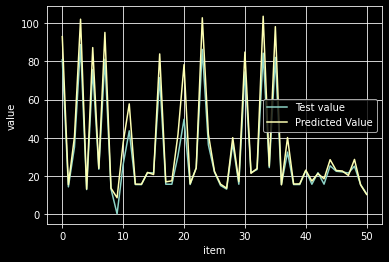

In [ ]:
plt.figure()
plt.xlabel('item')
plt.ylabel('value')
plt.plot(range(0,len(YTest)), YTest, label='Test value')
plt.plot(range(0,len(YTest)), predict_y, label = 'Predicted Value')
plt.legend()
# plt.scatter()
plt.grid()
plt.show()